# Visualising Land Cover Class Change with Altair

This notebook is one of three notebooks that serve to show how the ESA CCI Toolbox can be used with D3.js. Here, we will show how the classes of a Land Cover Dataset can be summed up and their change over time can be visualised in a D3.js chart accessed over the Altair library. Several preprocessing steps are applied, partly using operations from the CCI Toolbox.

For this notebook, we use the altair library. Install it into your Python environment if you haven't already done so:

In [1]:
# ! mamba install --yes altair

Now we can make all the necessary imports.

In [2]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from esa_climate_toolbox.core import get_op
from esa_climate_toolbox.core import list_ecv_datasets
from esa_climate_toolbox.core import open_data

We start by listing all the Land Cover Datasets. For more information on Land Cover Data, see here: https://climate.esa.int/en/projects/land-cover/.

In [3]:
list_ecv_datasets("LC")

[('esacci.LC.13-yrs.L4.WB.ASAR.Envisat.Map.4-0.r1', 'esa-cci'),
 ('esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A01.v1-2.Africa',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A02.v1-2.Amazonia',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A03.v1-2.Siberia',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A01.v1-2.Africa',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A02.v1-2.Amazonia',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A03.v1-2.Siberia',
  'esa-cci'),
 ('esacci.LC.yr.L4.LCCS.multi-sensor.multi-platform.Map.2-0-7.r1', 'esa-cci'),
 ('esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A01.v1-2.Africa',
  'esa-cci'),
 ('esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A02.v1-2.Amazonia',
  'esa-cci'),
 ('esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A03.v1-2.Siberia',
  'esa-cci'),
 ('esacc

Of these, we open the one provided from the zarr store, using the toolbox' `open_data` function. Note this method returns a tuple, consisting of the data and its identifier. We are only interested in the data here.

In [4]:
lc_ds, _ = open_data("ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr", data_store_id="esa-cci-zarr")
lc_ds

<xarray.Dataset> Size: 4TB
Dimensions:              (time: 24, lat: 64800, lon: 129600)
Coordinates:
  * lat                  (lat) float32 259kB 90.0 90.0 89.99 ... -90.0 -90.0
  * lon                  (lon) float32 518kB -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 192B 1992-07-02 ... 2015-07-03
Data variables:
    change_count         (time, lat, lon) float32 806GB dask.array<chunksize=(1, 2592, 1296), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 806GB dask.array<chunksize=(1, 2592, 1296), meta=np.ndarray>
    lccs_class           (time, lat, lon) float32 806GB dask.array<chunksize=(1, 2592, 1296), meta=np.ndarray>
    observation_count    (time, lat, lon) float32 806GB dask.array<chunksize=(1, 2592, 1296), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 806GB dask.array<chunksize=(1, 2592, 1296), meta=np.ndarray>
Attributes: (12/40)
    Conventions:                CF-1.6
    TileSize:                   2048:2048
    catalogue_url:              https://catalogue.ceda.ac.uk/uuid/b382ebe6679...
    cdm_data_type:              grid
    comment:                    
    contact:                    landcover-cci@uclouvain.be
    ...                         ...
    time_coverage_end:          20150703T000000Z
    time_coverage_resolution:   P1Y
    time_coverage_start:        20150703T000000Z
    title:                      ESA CCI Land Cover Map
    tracking_id:                12590bad-9014-4a91-9048-d06b67965490
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

This dataset shows global land cover classes for the years from 1992 to 2015. The spatial is very large. We therefore want to focus on a smaller region, covering the Amazon rain forest. For subsetting, we use the toolbox' `subset_spatial` operation. The region is passed in as a string in the form of "min_lon, min_lat, max_lon, max_lat".

In [5]:
subset_spatial = get_op("subset_spatial")
lc_ds_sub = subset_spatial(lc_ds, region="-61, -5, -47, 2")
lc_ds_sub

<xarray.Dataset> Size: 6GB
Dimensions:              (time: 24, lat: 2520, lon: 5042)
Coordinates:
  * lat                  (lat) float32 10kB 1.999 1.996 1.993 ... -4.996 -4.999
  * lon                  (lon) float32 20kB -61.0 -61.0 -61.0 ... -47.0 -47.0
  * time                 (time) datetime64[ns] 192B 1992-07-02 ... 2015-07-03
Data variables:
    change_count         (time, lat, lon) float32 1GB dask.array<chunksize=(1, 2016, 1225), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 1GB dask.array<chunksize=(1, 2016, 1225), meta=np.ndarray>
    lccs_class           (time, lat, lon) float32 1GB dask.array<chunksize=(1, 2016, 1225), meta=np.ndarray>
    observation_count    (time, lat, lon) float32 1GB dask.array<chunksize=(1, 2016, 1225), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 1GB dask.array<chunksize=(1, 2016, 1225), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                CF-1.6
    TileSize:                   2048:2048
    catalogue_url:              https://catalogue.ceda.ac.uk/uuid/b382ebe6679...
    cdm_data_type:              grid
    comment:                    
    contact:                    landcover-cci@uclouvain.be
    ...                         ...
    time_coverage_start:        20150703T000000Z
    title:                      ESA CCI Land Cover Map
    tracking_id:                12590bad-9014-4a91-9048-d06b67965490
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((-61.002777099609375 -5.0, -61.002777...

Now that we have made the dataset somewhat smaller, we may plot the data for the first and last timestep.

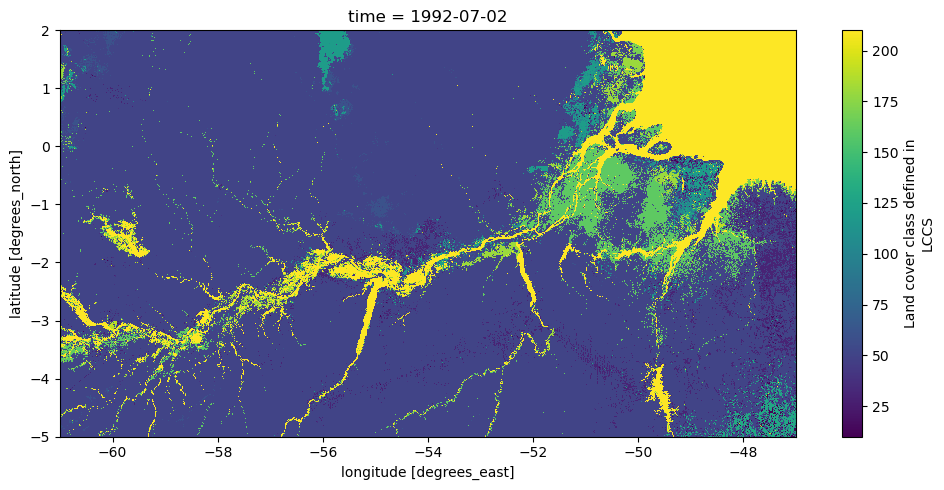

In [6]:
%matplotlib inline
lc_ds_sub.lccs_class.isel(time=0).plot(figsize=(10, 5))

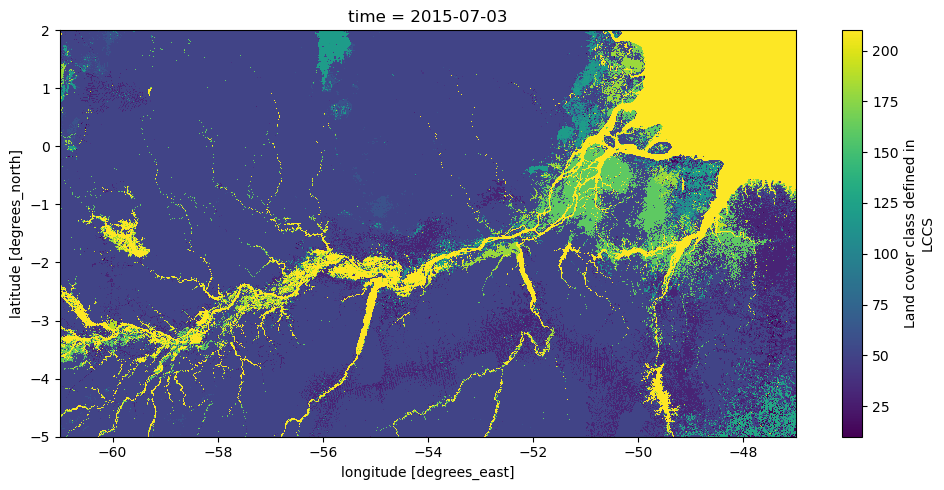

In [7]:
lc_ds_sub.lccs_class.isel(time=-1).plot(figsize=(10, 5))

It seems there are some differences. It might be good to look them up in more detail. If we look at the metadata of `lccs_class`, we see that flags and their meanings are defined. We have a look at the flag values first.

In [8]:
lc_flag_values = np.array(lc_ds_sub.lccs_class.attrs.get("flag_values"))
lc_flag_values

array([   0,   10,   11,   12,   20,   30,   40,   50,   60,   61,   62,
         70,   71,   72,   80,   81,   82,   90,  100,  110,  120,  121,
        122, -126, -116, -106, -105, -104, -103,  -96,  -86,  -76,  -66,
        -56,  -55,  -54,  -46,  -36])

Apparently, there was a mix-up with unsigned values. To account for this, we add the value 256 to all negative flag values in this list (not in the dataset itself, where the values are fine).

In [9]:
lc_flag_values = np.where(lc_flag_values < 0, lc_flag_values + 256, lc_flag_values).astype(np.uint8)
lc_flag_values

array([  0,  10,  11,  12,  20,  30,  40,  50,  60,  61,  62,  70,  71,
        72,  80,  81,  82,  90, 100, 110, 120, 121, 122, 130, 140, 150,
       151, 152, 153, 160, 170, 180, 190, 200, 201, 202, 210, 220],
      dtype=uint8)

This is better. We now extract the flag meanings. As these are given in one big string, we split it whenver we encounter a space.

In [10]:
lc_flag_meanings = lc_ds_sub.lccs_class.attrs.get("flag_meanings")
lc_flag_meanings = lc_flag_meanings.split(" ")
lc_flag_meanings

['no_data',
 'cropland_rainfed',
 'cropland_rainfed_herbaceous_cover',
 'cropland_rainfed_tree_or_shrub_cover',
 'cropland_irrigated',
 'mosaic_cropland',
 'mosaic_natural_vegetation',
 'tree_broadleaved_evergreen_closed_to_open',
 'tree_broadleaved_deciduous_closed_to_open',
 'tree_broadleaved_deciduous_closed',
 'tree_broadleaved_deciduous_open',
 'tree_needleleaved_evergreen_closed_to_open',
 'tree_needleleaved_evergreen_closed',
 'tree_needleleaved_evergreen_open',
 'tree_needleleaved_deciduous_closed_to_open',
 'tree_needleleaved_deciduous_closed',
 'tree_needleleaved_deciduous_open',
 'tree_mixed',
 'mosaic_tree_and_shrub',
 'mosaic_herbaceous',
 'shrubland',
 'shrubland_evergreen',
 'shrubland_deciduous',
 'grassland',
 'lichens_and_mosses',
 'sparse_vegetation',
 'sparse_tree',
 'sparse_shrub',
 'sparse_herbaceous',
 'tree_cover_flooded_fresh_or_brakish_water',
 'tree_cover_flooded_saline_water',
 'shrub_or_herbaceous_cover_flooded',
 'urban',
 'bare_areas',
 'bare_areas_consol

Now we simply combine these to have pairs of flag values and flag meanings.

In [11]:
lc_flags = [(lc_flag_values[i], lc_flag_meanings[i]) for i in range(len(lc_flag_values))]
lc_flags

[(np.uint8(0), 'no_data'),
 (np.uint8(10), 'cropland_rainfed'),
 (np.uint8(11), 'cropland_rainfed_herbaceous_cover'),
 (np.uint8(12), 'cropland_rainfed_tree_or_shrub_cover'),
 (np.uint8(20), 'cropland_irrigated'),
 (np.uint8(30), 'mosaic_cropland'),
 (np.uint8(40), 'mosaic_natural_vegetation'),
 (np.uint8(50), 'tree_broadleaved_evergreen_closed_to_open'),
 (np.uint8(60), 'tree_broadleaved_deciduous_closed_to_open'),
 (np.uint8(61), 'tree_broadleaved_deciduous_closed'),
 (np.uint8(62), 'tree_broadleaved_deciduous_open'),
 (np.uint8(70), 'tree_needleleaved_evergreen_closed_to_open'),
 (np.uint8(71), 'tree_needleleaved_evergreen_closed'),
 (np.uint8(72), 'tree_needleleaved_evergreen_open'),
 (np.uint8(80), 'tree_needleleaved_deciduous_closed_to_open'),
 (np.uint8(81), 'tree_needleleaved_deciduous_closed'),
 (np.uint8(82), 'tree_needleleaved_deciduous_open'),
 (np.uint8(90), 'tree_mixed'),
 (np.uint8(100), 'mosaic_tree_and_shrub'),
 (np.uint8(110), 'mosaic_herbaceous'),
 (np.uint8(120), 's

As the metadata is prepared, we can continue with preparing the LC dataset to be used with Altair. Now, as Altair expects pandas dataframes, we need to convert it. We could use the `to_dataframe` operation from the toolbox (which eventually is used in the other notebooks), but here we want to apply an additional step, where we count the number of occurences per class in each year. We therefore write a dedicated function. As this takes a little time to complete, we print out the time as means to measure the progress.

In [12]:
lc_data = []
for i, t in enumerate(lc_ds_sub.time):
    date = pd.Timestamp(t.values).strftime("%Y-%m-%d")
    print(date)
    for lc_flag, lc_flag_name in lc_flags:
        if lc_flag_name == "no_data":
            continue
        flag_count = (lc_ds_sub.isel(time=i)["lccs_class"] == lc_flag).sum().values
        lc_data.append({
            "date": date,
            "lc_class": lc_flag_name,
            "lc_count": flag_count
        })
df = pd.DataFrame(lc_data)
df

1992-07-02
1993-07-03
1994-07-03
1995-07-03
1996-07-02
1997-07-03
1998-07-03
1999-07-03
2000-07-02
2001-07-03
2002-07-03
2003-07-03
2004-07-02
2005-07-03
2006-07-03
2007-07-03
2008-07-02
2009-07-03
2010-07-03
2011-07-03
2012-07-02
2013-07-03
2014-07-03
2015-07-03


,date,lc_class,lc_count
0,1992-07-02,cropland_rainfed,3759
1,1992-07-02,cropland_rainfed_herbaceous_cover,16131
2,1992-07-02,cropland_rainfed_tree_or_shrub_cover,0
3,1992-07-02,cropland_irrigated,0
4,1992-07-02,mosaic_cropland,312463
...,...,...,...
883,2015-07-03,bare_areas,574
884,2015-07-03,bare_areas_consolidated,0
885,2015-07-03,bare_areas_unconsolidated,0
886,2015-07-03,water,1516228


We end up with a dataframe that can be used with Altair. However, on closer inspection, there are a few classes that are not present in our subset. We remove these from the dataframe.

In [13]:
for lc_flag, lc_flag_name in lc_flags:
    lc_count_sum = df[df["lc_class"] == lc_flag_name].lc_count.sum()
    if lc_count_sum == 0:
        print(f"Removing {lc_flag_name} from data frame")
        df = df[df["lc_class"] != lc_flag_name]
df

Removing no_data from data frame
Removing cropland_rainfed_tree_or_shrub_cover from data frame
Removing cropland_irrigated from data frame
Removing tree_needleleaved_evergreen_closed_to_open from data frame
Removing tree_needleleaved_evergreen_closed from data frame
Removing tree_needleleaved_evergreen_open from data frame
Removing tree_needleleaved_deciduous_closed from data frame
Removing tree_needleleaved_deciduous_open from data frame
Removing tree_mixed from data frame
Removing shrubland_evergreen from data frame
Removing shrubland_deciduous from data frame
Removing lichens_and_mosses from data frame
Removing sparse_tree from data frame
Removing sparse_shrub from data frame
Removing bare_areas_consolidated from data frame
Removing bare_areas_unconsolidated from data frame
Removing snow_and_ice from data frame


,date,lc_class,lc_count
0,1992-07-02,cropland_rainfed,3759
1,1992-07-02,cropland_rainfed_herbaceous_cover,16131
4,1992-07-02,mosaic_cropland,312463
5,1992-07-02,mosaic_natural_vegetation,72470
6,1992-07-02,tree_broadleaved_evergreen_closed_to_open,9744931
...,...,...,...
880,2015-07-03,tree_cover_flooded_saline_water,21072
881,2015-07-03,shrub_or_herbaceous_cover_flooded,229015
882,2015-07-03,urban,15941
883,2015-07-03,bare_areas,574


Finally, we can create a stacked chart from the Altair library. We assign the x-axis to display the date, the y-axis to show the occurences per class, and we assign a different color to each of the classes.

In [14]:
alt.Chart(df).mark_area().encode(
    x="date:T",
    y=alt.Y("lc_count:Q"),
    color="lc_class:N"
)

alt.Chart(...)

A clear increase of cropland becomes visible, with a simultaneous decrease of natural herbaceous vegetation. Note that on the top right of the chart, you can open a menu that provides you with image export options, as well as an alternative insight into the data.